Image Height: 640, Width: 480


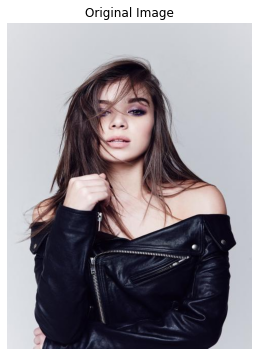

Processing pixel: (0, 0)


RuntimeError: DMA channel not started

In [1]:
import pynq
from pynq import Overlay
from pynq.lib.dma import DMA
import numpy as np
from pynq import allocate
import cv2
import matplotlib.pyplot as plt
import time

# Load the overlay that includes the row_parallel_processor module
overlay = Overlay("two.bit")  # Ensure you have the correct bitstream file
dma = overlay.axi_dma_0

# Reading image
image_path = "hailee_resized.jpg"  # Path to your image
image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Read as color
height, width, _ = image.shape  # Get dimensions including the color channels
print(f"Image Height: {height}, Width: {width}")

# Display the original image
plt.figure(figsize=(6, 6))
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis('off')
plt.show()

# Preparing to process the image one pixel at a time
processed_image = np.zeros_like(image)  # Initialize processed image with the same shape

# Start timing
start_time = time.time()

# Create a buffer for a single pixel (3 channels)
input_buffer = allocate(shape=(3,), dtype=np.uint8)  # 8 bits per channel for RGB
output_buffer = allocate(shape=(3,), dtype=np.uint8)  # 8 bits per channel for RGB

# Process each pixel
for i in range(height):
    for j in range(width):
        print(f"Processing pixel: ({i}, {j})")
        
        # Create a buffer for a single pixel (3 channels)
        
        # Copy the single pixel data into the input buffer
        np.copyto(input_buffer, image[i, j, :])  # Copy the pixel's color channels

        # Start DMA transfer
        dma.sendchannel.transfer(input_buffer)
        dma.recvchannel.transfer(output_buffer)

        # Wait for the transfer to complete
        dma.sendchannel.wait()
        dma.recvchannel.wait()

        # Copy processed pixel back to output image
        processed_image[i, j, :] = output_buffer[:]  # Reshape back to (1, 1, 3) automatically

# Free allocated buffers
input_buffer.freebuffer()
output_buffer.freebuffer()

# End timing
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time
print(f"Processing time: {elapsed_time:.2f} seconds")

# Display the processed image
plt.figure(figsize=(6, 6))
plt.title("Processed Image")
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis('off')
plt.show()


Image Height: 640, Width: 480


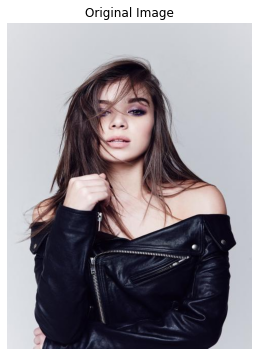

Processing row: 0
Processing row: 1
Processing row: 2
Processing row: 3
Processing row: 4
Processing row: 5
Processing row: 6
Processing row: 7
Processing row: 8
Processing row: 9
Processing row: 10
Processing row: 11
Processing row: 12
Processing row: 13
Processing row: 14
Processing row: 15
Processing row: 16
Processing row: 17
Processing row: 18
Processing row: 19
Processing row: 20
Processing row: 21
Processing row: 22
Processing row: 23
Processing row: 24
Processing row: 25
Processing row: 26
Processing row: 27
Processing row: 28
Processing row: 29
Processing row: 30
Processing row: 31
Processing row: 32
Processing row: 33
Processing row: 34
Processing row: 35
Processing row: 36
Processing row: 37
Processing row: 38
Processing row: 39
Processing row: 40
Processing row: 41
Processing row: 42
Processing row: 43
Processing row: 44
Processing row: 45
Processing row: 46
Processing row: 47
Processing row: 48
Processing row: 49
Processing row: 50
Processing row: 51
Processing row: 52
Pro

Processing row: 514
Processing row: 515
Processing row: 516
Processing row: 517
Processing row: 518
Processing row: 519
Processing row: 520
Processing row: 521
Processing row: 522
Processing row: 523
Processing row: 524
Processing row: 525
Processing row: 526
Processing row: 527
Processing row: 528
Processing row: 529
Processing row: 530
Processing row: 531
Processing row: 532
Processing row: 533
Processing row: 534
Processing row: 535
Processing row: 536
Processing row: 537
Processing row: 538
Processing row: 539
Processing row: 540
Processing row: 541
Processing row: 542
Processing row: 543
Processing row: 544
Processing row: 545
Processing row: 546
Processing row: 547
Processing row: 548
Processing row: 549
Processing row: 550
Processing row: 551
Processing row: 552
Processing row: 553
Processing row: 554
Processing row: 555
Processing row: 556
Processing row: 557
Processing row: 558
Processing row: 559
Processing row: 560
Processing row: 561
Processing row: 562
Processing row: 563


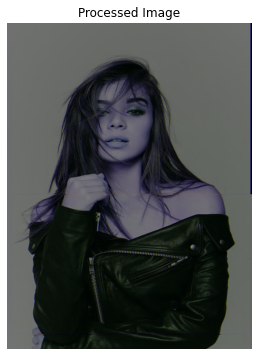

In [2]:
import pynq
from pynq import Overlay
from pynq.lib.dma import DMA
import numpy as np
from pynq import allocate
import cv2
import matplotlib.pyplot as plt
import time

# Load the overlay that includes the row_parallel_processor module
overlay = Overlay("two.bit")  # Ensure you have the correct bitstream file
dma = overlay.axi_dma_0

# Reading image
image_path = "hailee_resized.jpg"  # Path to your image
image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Read as color
height, width, _ = image.shape  # Get dimensions including the color channels
print(f"Image Height: {height}, Width: {width}")

# Display the original image
plt.figure(figsize=(6, 6))
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis('off')
plt.show()

# Preparing to process the image one row at a time
row_size = width * 3  # Each row has 'width' pixels and 3 channels
processed_image = np.zeros_like(image)  # Initialize processed image with the same shape
# Allocate buffers for a single row
input_buffer = allocate(shape=(row_size,), dtype=np.uint8)  # 8 bits per pixel for each channel
output_buffer = allocate(shape=(row_size,), dtype=np.uint8)  # 8 bits per pixel for each channel

# Start timing
start_time = time.time()

# Process each row
for i in range(height):
    print(f"Processing row: {i}")
    
    
    # Copy the row data into input buffer
    np.copyto(input_buffer, image[i, :, :].flatten())  # Copy one row with all color channels

    # Start DMA transfer
    dma.sendchannel.transfer(input_buffer)
    dma.recvchannel.transfer(output_buffer)

    # Wait for the transfer to complete
    dma.sendchannel.wait()
    dma.recvchannel.wait()

    # Copy processed row back to output image
    processed_image[i, :, :] = output_buffer.reshape((1, width, 3))  # Reshape back to (1, width, 3)

# Free allocated buffers
input_buffer.freebuffer()
output_buffer.freebuffer()

# End timing
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time
print(f"Processing time: {elapsed_time:.2f} seconds")

# Display the processed image
plt.figure(figsize=(6, 6))
plt.title("Processed Image")
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis('off')
plt.show()


Image Height: 1289, Width: 1980


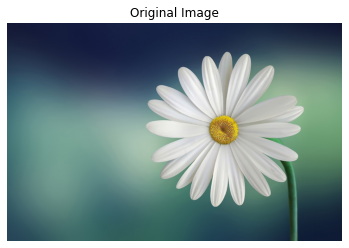

Processing rows: 0 to 7
Processing rows: 8 to 15
Processing rows: 16 to 23
Processing rows: 24 to 31
Processing rows: 32 to 39
Processing rows: 40 to 47
Processing rows: 48 to 55
Processing rows: 56 to 63
Processing rows: 64 to 71
Processing rows: 72 to 79
Processing rows: 80 to 87
Processing rows: 88 to 95
Processing rows: 96 to 103
Processing rows: 104 to 111
Processing rows: 112 to 119
Processing rows: 120 to 127
Processing rows: 128 to 135
Processing rows: 136 to 143
Processing rows: 144 to 151
Processing rows: 152 to 159
Processing rows: 160 to 167
Processing rows: 168 to 175
Processing rows: 176 to 183
Processing rows: 184 to 191
Processing rows: 192 to 199
Processing rows: 200 to 207
Processing rows: 208 to 215
Processing rows: 216 to 223
Processing rows: 224 to 231
Processing rows: 232 to 239
Processing rows: 240 to 247
Processing rows: 248 to 255
Processing rows: 256 to 263
Processing rows: 264 to 271
Processing rows: 272 to 279
Processing rows: 280 to 287
Processing rows: 288

ValueError: could not broadcast input array from shape (5940,) into shape (47520,)

In [1]:
import pynq
from pynq import Overlay
from pynq.lib.dma import DMA
import numpy as np
from pynq import allocate
import cv2
import matplotlib.pyplot as plt
import time

# Load the overlay that includes the row_parallel_processor module
overlay = Overlay("one.bit")  # Ensure you have the correct bitstream file
dma = overlay.axi_dma_0

# Reading image
image_path = "report.jpg"  # Path to your image
image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Read as color
height, width, _ = image.shape  # Get dimensions including the color channels
print(f"Image Height: {height}, Width: {width}")

# Display the original image
plt.figure(figsize=(6, 6))
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis('off')
plt.show()

# Preparing to process the image in chunks of 8 rows
num_rows_per_chunk = 8
row_size = width * 3  # Each row has 'width' pixels and 3 channels
chunk_size = num_rows_per_chunk * row_size  # Size for 8 rows

# Initialize processed image
processed_image = np.zeros_like(image)  # Initialize with the same shape

# Start timing
start_time = time.time()

# Process each chunk of 8 rows
for i in range(0, height, num_rows_per_chunk):
    print(f"Processing rows: {i} to {min(i + num_rows_per_chunk, height) - 1}")
    
    # Allocate buffers for a chunk of 8 rows
    input_buffer = allocate(shape=(chunk_size,), dtype=np.uint8)  # Buffer for 8 rows
    output_buffer = allocate(shape=(chunk_size,), dtype=np.uint8)  # Buffer for 8 rows

    # Copy the chunk of row data into input buffer
    end_row = min(i + num_rows_per_chunk, height)  # Make sure we don't exceed height
    chunk_rows = image[i:end_row, :, :].reshape(-1)  # Flatten chunk of rows into a 1D array
    np.copyto(input_buffer, chunk_rows)  # Copy the chunk into the input buffer

    # Start DMA transfer
    dma.sendchannel.transfer(input_buffer)
    dma.recvchannel.transfer(output_buffer)

    # Wait for the transfer to complete
    dma.sendchannel.wait()
    dma.recvchannel.wait()

    # Copy processed chunk back to output image
    processed_image[i:end_row, :, :] = output_buffer.reshape((end_row - i, width, 3))  # Reshape back to (number of rows, width, 3)

    # Free allocated buffers
    input_buffer.freebuffer()
    output_buffer.freebuffer()

# End timing
end_time = time.time()

# Calculate elapsed time
elapsed_time = end_time - start_time
print(f"Processing time: {elapsed_time:.2f} seconds")

# Display the processed image
plt.figure(figsize=(6, 6))
plt.title("Processed Image")
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis('off')
plt.show()
